In [1]:
import Potapov
import Roots
import Time_Delay_Network
import functions
import numpy as np
import numpy.testing as testing
import Time_Sims_nonlin
import Hamiltonian

import numpy as np
import numpy.linalg as la
from scipy.integrate import ode
import scipy.constants as consts
import copy as cp

import matplotlib.pyplot as plt
import time
%pylab inline
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


#  One approach to perturbing the roots is to define a cost function in terms of real variables and minimize. This is done in Time_Delay_Network.get_minimizing_function_z and Hamiltonian.minimize_roots_z

In [2]:
Ex = Time_Delay_Network.Example3( max_linewidth=15.,max_freq=50.)
Ex.run_Potapov(commensurate_roots=True)
modes = Ex.spatial_modes
A,B,C,D = Ex.get_Potapov_ABCD(doubled=False)
ham = Hamiltonian.Hamiltonian(Ex.roots,modes,Ex.delays,Omega=-1j*A,
            nonlin_coeff = 1.)

In [3]:
chi_nonlin_test = Hamiltonian.Chi_nonlin(delay_indices=[0],start_nonlin=0,
                           length_nonlin=0.1*consts.c)
chi_nonlin_test.refraction_index_func = lambda freq, pol: 1. + 1e-1 * abs(freq / (np.pi))
ham.chi_nonlinearities.append(chi_nonlin_test)
ham.make_Delta_delays()

In [4]:
old_roots = cp.copy(ham.roots)

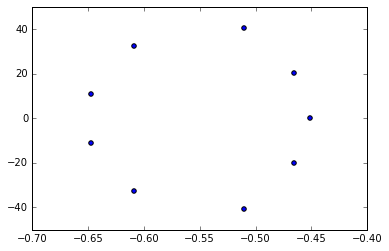

In [5]:
plt.scatter(np.asarray(old_roots).real,np.asarray(old_roots).imag)


In [6]:
func,dfunc = Ex.get_minimizing_function_z()

In [7]:
ham.minimize_roots_z(func,dfunc)

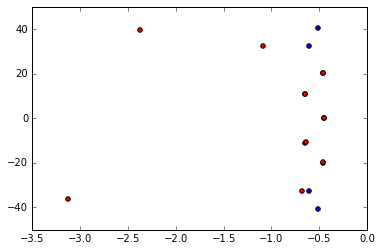

In [8]:
plt.scatter(np.asarray(old_roots).real,np.asarray(old_roots).imag,c = 'b')
plt.scatter(np.asarray(ham.roots).real,np.asarray(ham.roots).imag,c = 'r')
plt.show()

In [9]:

#plt.scatter(np.asarray(ham.roots).real,np.asarray(ham.roots).imag)
#plt.show()

# Using Newton's method instead

In [15]:

def plot_with_refract_index(strength):
    ## This nonlinearity will depend on the frequency.
    
    Ex = Time_Delay_Network.Example3( max_linewidth=15.,max_freq=500.)
    Ex.run_Potapov(commensurate_roots=True)
    modes = Ex.spatial_modes
    A,B,C,D = Ex.get_Potapov_ABCD(doubled=False)
    ham = Hamiltonian.Hamiltonian(Ex.roots,modes,Ex.delays,Omega=-1j*A,
                nonlin_coeff = 1.)
    chi_nonlin_test = Hamiltonian.Chi_nonlin(delay_indices=[0],start_nonlin=0,
                               length_nonlin=0.1*consts.c)
    chi_nonlin_test.refraction_index_func = lambda freq, pol: 1. + strength * abs(freq / (np.pi))
    ham.chi_nonlinearities.append(chi_nonlin_test)

    ## update delays, which are different becuase of the nonlinearity.

    perturb_func = Ex.get_frequency_pertub_func_z(use_ufuncify = True)
    ham.perturb_roots_z(perturb_func)
    # print ham.roots
    # print len(ham.roots)

    plt.scatter(np.asarray(ham.roots).real,np.asarray(ham.roots).imag)
    plt.show()


root adjustment converged!


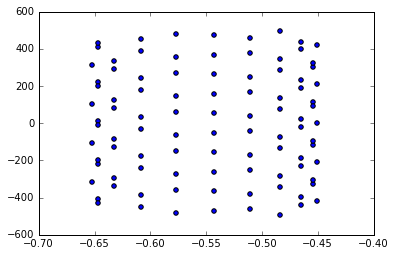

In [16]:
plot_with_refract_index(0.)

root adjustment converged!


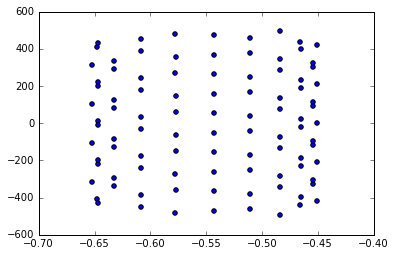

In [20]:
plot_with_refract_index(2e-6)

root adjustment converged!


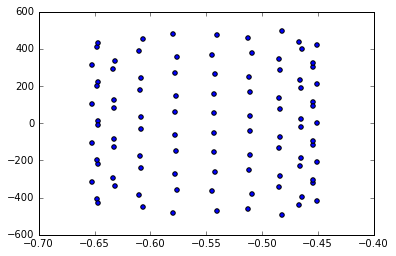

In [18]:
plot_with_refract_index(0.00005)

root adjustment converged!


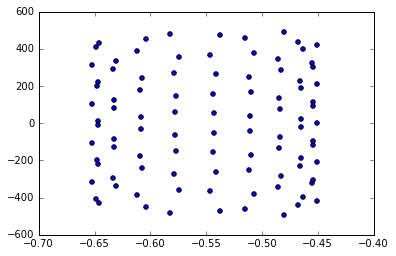

In [19]:
plot_with_refract_index(0.0001)